In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r'E:\yjn6gtwcdb-1\yjn6gtwcdb-1\HEA Phase Prediction_Datasets and Code\AM_IM_SS_Multi.csv')
dataset.head()

,Alloy,No,Component,Fraction,a,delta,Tm,D_Tm,Hmix,?Hmix,Sid,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,Phase_inshort
0,Zr45.38Ti9.62Cu8.75Ni10Be26.25,5,Zr Ti Cu Ni Be,45.38 9.62 8.75 10 26.25,1.400611,0.146608,1853.515475,283.938040,-37.996770,12.967122,1.378296,1.521077,0.211945,4.687500,2.909440,1.070000e+11,36.898355,AM
1,AlCoCu,3,Al Co Cu,7 1 2,1.383100,0.054241,1101.783000,278.066295,-5.400000,4.272798,0.801819,1.695000,0.129942,5.200000,3.400000,9.920000e+10,36.912870,IM
2,Al20Li20Mg10Sc20Ti30,5,Al Li Mg Sc Ti,20 20 10 20 30,1.517100,0.051625,1314.832000,600.177793,-0.400000,14.116742,1.557113,1.383000,0.225435,2.800000,1.077033,6.630000e+10,35.581034,SS
3,CoCrCuFeZr0.8,5,Co Cr Cu Fe Zr,1 1 1 1 0.8,1.312792,0.099336,1837.327083,295.977082,-9.687500,10.484101,1.605807,1.736250,0.201097,7.750000,2.349645,1.470000e+11,36.733420,AM+IM
4,Al0.5CoCrCuFeNiTi1.4,7,Al Co Cr Cu Fe Ni Ti,0.5 1 1 1 1 1 1.4,1.308377,0.069377,1743.319565,324.684788,-14.022264,9.492334,1.913480,1.759565,0.147643,7.405797,2.704365,1.480000e+11,32.645454,IM+SS


<AxesSubplot:xlabel='Phase_inshort', ylabel='count'>

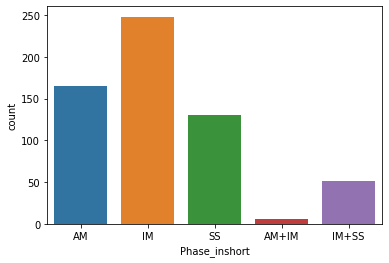

In [3]:
sns.countplot(dataset['Phase_inshort'],label="Count")

In [4]:
X = dataset.iloc[:,4:17].values
y = dataset.iloc[:,17].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [6]:
print(dataset.groupby(y).size())

AM       165
AM+IM      6
IM       248
IM+SS     51
SS       131
dtype: int64


In [7]:
X = X.values

In [8]:
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(13, input_dim = 13, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(26, activation = 'relu'))
    model.add(Dense(26, activation = 'relu'))
    model.add(Dense(26, activation = 'relu'))
    model.add(Dense(26, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [9]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(baseline_model, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [12]:
results = cross_val_score(estimator, X, y, cv = kfold)
# Result

print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Result: 84.19% (3.69%)


In [13]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(estimator, X, y, cv = kfold)

In [14]:
y

array(['AM', 'IM', 'SS', 'AM+IM', 'IM+SS', 'IM', 'AM', 'IM', 'AM', 'SS',
       'IM', 'SS', 'SS', 'IM', 'AM', 'IM', 'IM', 'AM', 'IM', 'SS', 'SS',
       'IM', 'AM', 'IM', 'IM', 'SS', 'SS', 'SS', 'SS', 'AM', 'AM', 'AM',
       'AM', 'AM', 'SS', 'IM', 'SS', 'AM', 'IM', 'SS', 'IM', 'IM+SS',
       'IM+SS', 'AM', 'SS', 'IM+SS', 'IM', 'AM', 'SS', 'AM', 'SS', 'SS',
       'IM', 'AM', 'AM', 'AM', 'SS', 'IM+SS', 'AM', 'IM', 'SS', 'IM+SS',
       'IM', 'AM', 'IM', 'AM', 'IM', 'AM', 'IM+SS', 'IM', 'SS', 'SS',
       'AM', 'IM', 'IM', 'IM', 'AM', 'SS', 'IM', 'AM', 'SS', 'SS', 'SS',
       'IM', 'AM', 'IM', 'IM', 'SS', 'IM', 'IM', 'IM', 'IM', 'SS', 'SS',
       'SS', 'AM', 'IM', 'SS', 'SS', 'AM', 'AM', 'SS', 'SS', 'AM', 'SS',
       'IM', 'IM', 'AM', 'IM', 'AM', 'SS', 'SS', 'IM', 'SS', 'IM', 'IM',
       'SS', 'SS', 'IM', 'IM+SS', 'AM', 'AM', 'AM', 'IM', 'AM', 'SS',
       'SS', 'IM', 'SS', 'AM', 'IM', 'IM', 'SS', 'IM', 'AM', 'AM', 'AM',
       'IM', 'AM', 'IM', 'AM', 'IM', 'IM+SS', 'IM', 'IM', 'S

In [15]:
y_pred

array(['AM', 'IM', 'SS', 'AM+IM', 'IM+SS', 'IM', 'AM', 'IM', 'AM', 'SS',
       'IM', 'SS', 'SS', 'IM', 'AM', 'IM', 'IM', 'AM', 'IM', 'SS', 'SS',
       'IM', 'AM', 'IM', 'IM', 'SS', 'SS', 'SS', 'SS', 'AM', 'AM', 'AM',
       'AM', 'AM', 'IM', 'IM', 'SS', 'AM', 'IM', 'IM+SS', 'IM', 'IM+SS',
       'SS', 'AM', 'SS', 'SS', 'IM', 'AM', 'SS', 'IM+SS', 'SS', 'SS',
       'IM', 'AM', 'AM', 'AM', 'SS', 'SS', 'AM', 'IM', 'SS', 'SS', 'IM',
       'AM', 'IM', 'AM', 'IM', 'AM', 'IM+SS', 'IM', 'SS', 'IM', 'AM',
       'IM', 'IM', 'IM', 'AM', 'SS', 'IM', 'SS', 'SS', 'AM+IM', 'SS',
       'IM', 'AM', 'IM', 'IM', 'SS', 'IM', 'IM', 'IM', 'IM', 'SS', 'SS',
       'IM+SS', 'AM', 'IM', 'SS', 'SS', 'AM', 'AM', 'SS', 'SS', 'AM',
       'IM+SS', 'IM', 'IM', 'IM', 'IM', 'AM', 'SS', 'SS', 'IM', 'SS',
       'IM', 'IM', 'SS', 'SS', 'IM', 'SS', 'AM', 'AM', 'AM', 'IM', 'AM',
       'SS', 'SS', 'IM', 'SS', 'AM', 'IM', 'AM', 'IM+SS', 'IM', 'AM',
       'AM', 'AM', 'IM', 'IM', 'IM', 'AM', 'IM', 'IM+SS', 'IM', 'IM',

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[147,   0,  13,   3,   2],
       [  1,   2,   0,   2,   1],
       [ 11,   0, 229,   3,   5],
       [  2,   0,   1,  27,  21],
       [  1,   1,   5,   9, 115]], dtype=int64)

In [17]:
.

SyntaxError: invalid syntax (Temp/ipykernel_11040/1933637684.py, line 1)